# Boston House price prediction
This project predicts the price of houses in Boston based on these variables
 Variables in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per 10,000'
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's


### Importing the dependencies 

In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 119.1 kB/s eta 0:17:29
   ---------------------------------------- 0.0/124.9 MB 119.1 kB/s eta 0:17:29
   ---------------------------------------- 0.0/124.9 MB 122.9 kB/s eta 0:16:57
   ---------------------------------------- 0.1/124.9 MB 182.2 kB/s eta 0:11:26
   ---------------------------------------- 0.1/124.9 MB 187.3 kB/s eta 0:11:07
   ---------------------------------------- 0.1/124.9 MB 218.5 kB/s eta 0:09:32
   ---------------------------------------- 0.1/124.9 MB 242.7 kB/s eta 0:08:35
   ---------------------------------------- 0.1/124.9 MB 274.5 kB/s eta 0:07:35
   --

In [5]:
import numpy as np # for numerical manipulation
import pandas as pd # For dataframe and data analysis
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for fine visuaizations
import sklearn.datasets # for importing datasets in scikit learn
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor # Regression model
from sklearn import metrics # for evaluating our model

#### Importing the Boston House Price Dataset

In [2]:
#sklearn.datasets.load_boston()

In [7]:
house_price_dataset = pd.read_csv("complete_data.csv")

In [9]:
house_price_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
#house_price_dataset.feature_names

In [21]:
house_price_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#house_price_dataframe.to_csv("boston.csv", index=False)

In [22]:
# Check the first five rows of the dataframe
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
#house_price_dataframe.to_csv("complete_data.csv", index=False)

In [24]:
# Checking the number of rows and columns in the dataframe
house_price_dataset.shape

(506, 14)

In [26]:
# Check for the missing values
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [27]:
# Statistical measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Understanding the correlation between various features of the dataset

In [28]:
# Understanding the correlation between various features of the dataset
# Postive correlation
# Negative correlation
correlation = house_price_dataset.corr()

In [29]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

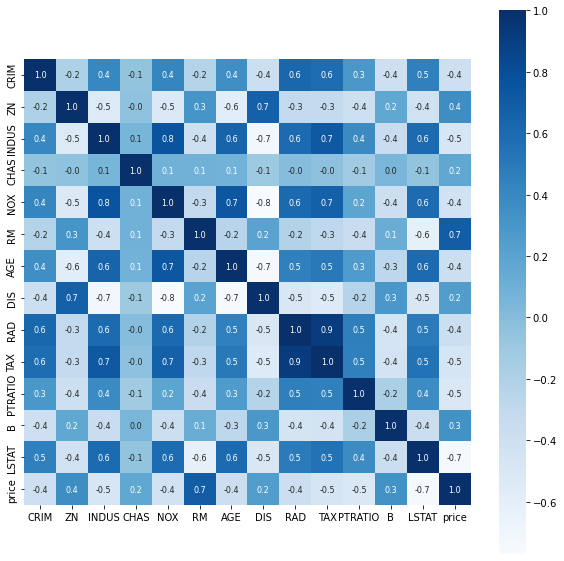

In [30]:
# Constructing a heatmap to unddertand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

In [31]:
# Assigning the target data a variable
X = house_price_dataset.drop(["price"], axis=1)
Y = house_price_dataset["price"]

In [32]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [33]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [34]:
# Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [36]:
print(Y.shape, Y_train.shape, Y_test.shape)

(506,) (404,) (102,)


In [37]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


### Model Training

In [22]:
# XGBoost Regressor
# Linear Regression


In [38]:
# Loading the model
model_1 = LinearRegression()
model_2 = XGBRFRegressor()

In [39]:
# Training the model with X_train
model_2.fit(X_train, Y_train) # Training our model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [45]:
#model_2.fit(X_train, Y_train)

### Evaluation

In [40]:
# Prediction on Training data
# accuracy for prediction on training data
training_data_predicion = model_2.predict(X_test) # Testing or predicting with trained model

In [41]:
training_data_predicion

array([22.695148, 29.70792 , 17.190205, 22.653553, 16.505047, 21.486464,
       19.058979, 15.539493, 21.25217 , 20.893353, 19.56244 , 19.398115,
        8.509203, 21.462364, 20.679146, 26.079744, 19.28911 ,  8.841115,
       45.625366, 14.815931, 23.45291 , 23.393291, 14.85265 , 24.1462  ,
       14.871098, 15.582429, 20.891386, 13.899944, 19.148323, 20.9016  ,
       20.18982 , 23.308853, 20.075031, 20.897213, 14.978961, 15.263086,
       35.24715 , 20.89482 , 20.781914, 23.318478, 18.49561 , 28.42419 ,
       45.305378, 20.500904, 22.425106, 15.071175, 15.810753, 23.359539,
       17.727222, 28.436148, 20.894949, 33.72998 , 16.474813, 26.073698,
       42.527714, 21.320993, 15.751789, 30.890354, 22.230974, 20.035822,
       25.434246, 34.303066, 28.746107, 19.869707, 27.682253, 17.40343 ,
       13.558291, 23.343956, 28.470663, 15.368401, 20.825176, 32.38406 ,
        9.483642, 22.322813, 21.423254,  8.1772  , 21.024431, 45.19751 ,
       11.673491, 13.159883, 21.083092, 13.647103, 

In [29]:
#X_test

In [39]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: price, Length: 102, dtype: float64

In [42]:
print(training_data_predicion)

[22.695148 29.70792  17.190205 22.653553 16.505047 21.486464 19.058979
 15.539493 21.25217  20.893353 19.56244  19.398115  8.509203 21.462364
 20.679146 26.079744 19.28911   8.841115 45.625366 14.815931 23.45291
 23.393291 14.85265  24.1462   14.871098 15.582429 20.891386 13.899944
 19.148323 20.9016   20.18982  23.308853 20.075031 20.897213 14.978961
 15.263086 35.24715  20.89482  20.781914 23.318478 18.49561  28.42419
 45.305378 20.500904 22.425106 15.071175 15.810753 23.359539 17.727222
 28.436148 20.894949 33.72998  16.474813 26.073698 42.527714 21.320993
 15.751789 30.890354 22.230974 20.035822 25.434246 34.303066 28.746107
 19.869707 27.682253 17.40343  13.558291 23.343956 28.470663 15.368401
 20.825176 32.38406   9.483642 22.322813 21.423254  8.1772   21.024431
 45.19751  11.673491 13.159883 21.083092 13.647103 20.67621   9.444347
 20.939455 25.48252  15.51375  23.320744 23.461878 17.462175 20.967802
  8.374338 20.517975 20.773275 23.099756 20.671358 38.27634  12.951912
 12.8812

In [43]:
model_2.score(X_test, training_data_predicion)

1.0

In [44]:
# R squared error
score_1 = metrics.r2_score(Y_test, training_data_predicion) # This will give the r2 error between the original values(Y_train and training data prediction)

In [45]:
# Mean Absolute Error
# this finds the differences between the original data and the actual prediction (subtracts all the predicted values from the original values)
score_2 = metrics.mean_absolute_error(Y_test, training_data_predicion) 

In [46]:
# This values of the R squared error should be close to 1 
# The value of the MAE(the lower the values the more accurate our model)
print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.8944062689034546
Mean Absolute Error :  2.087235574161305


### Prediction on Test Data

In [54]:
# # accuracy for prediction on test data
# test_data_prediction = model_1.predict(X_test)

In [70]:
# # R squared error
# score_1 = metrics.r2_score(Y_test, test_data_prediction)

In [71]:
# # Mean Abolute error
# score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [55]:
# print("R squared error : ", score_1)
# print("Mean Absolute Error :", score_2)

### Visualizing the actual Prices and predicted prices

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

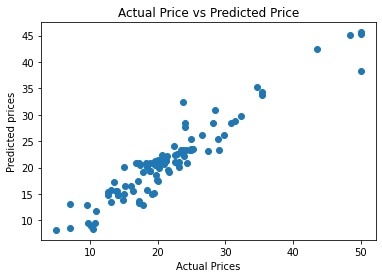

In [58]:
plt.scatter(Y_test, training_data_predicion)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Price vs Predicted Price")